In [ ]:
#Importing all Dependencies
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

In [ ]:
#Loading The Dataset To Memory in a Panda Dataframe & printing the first (5) rows of the dataset
df = pd.read_csv('Maternal Health Risk Data Set.csv')
df.head()

,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate,RiskLevel
0,25,130,80,15.0,98.0,86,high risk
1,35,140,90,13.0,98.0,70,high risk
2,29,90,70,8.0,100.0,80,high risk
3,30,140,85,7.0,98.0,70,high risk
4,35,120,60,6.1,98.0,76,low risk


In [ ]:
# printing the last five (5) rows of the dataset
df.tail()

,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate,RiskLevel
1009,22,120,60,15.0,98.0,80,high risk
1010,55,120,90,18.0,98.0,60,high risk
1011,35,85,60,19.0,98.0,86,high risk
1012,43,120,90,18.0,98.0,70,high risk
1013,32,120,65,6.0,101.0,76,mid risk


In [ ]:
#Checking Feature Type in the Dataset
df.dtypes

Age              int64
SystolicBP       int64
DiastolicBP      int64
BS             float64
BodyTemp       float64
HeartRate        int64
RiskLevel       object
dtype: object

In [ ]:
# getting some information about the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1014 entries, 0 to 1013
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          1014 non-null   int64  
 1   SystolicBP   1014 non-null   int64  
 2   DiastolicBP  1014 non-null   int64  
 3   BS           1014 non-null   float64
 4   BodyTemp     1014 non-null   float64
 5   HeartRate    1014 non-null   int64  
 6   RiskLevel    1014 non-null   object 
dtypes: float64(2), int64(4), object(1)
memory usage: 55.6+ KB


In [ ]:
# number of rows and columns in the dataset
df.shape

(1014, 7)

In [ ]:
# statistical measures about the dataset
df.describe()

,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate
count,1014.000000,1014.000000,1014.000000,1014.000000,1014.000000,1014.000000
mean,29.871795,113.198225,76.460552,8.725986,98.665089,74.301775
std,13.474386,18.403913,13.885796,3.293532,1.371384,8.088702
min,10.000000,70.000000,49.000000,6.000000,98.000000,7.000000
25%,19.000000,100.000000,65.000000,6.900000,98.000000,70.000000
50%,26.000000,120.000000,80.000000,7.500000,98.000000,76.000000
75%,39.000000,120.000000,90.000000,8.000000,98.000000,80.000000
max,70.000000,160.000000,100.000000,19.000000,103.000000,90.000000


In [ ]:
# checking for missing values
df.isnull().sum()

Age            0
SystolicBP     0
DiastolicBP    0
BS             0
BodyTemp       0
HeartRate      0
RiskLevel      0
dtype: int64

In [ ]:
#Checking for unique variables
df.nunique()

Age            50
SystolicBP     19
DiastolicBP    16
BS             29
BodyTemp        8
HeartRate      16
RiskLevel       3
dtype: int64

In [ ]:
#Checking for Data Balance in the Target Variable
df['RiskLevel'].value_counts()

low risk     406
mid risk     336
high risk    272
Name: RiskLevel, dtype: int64

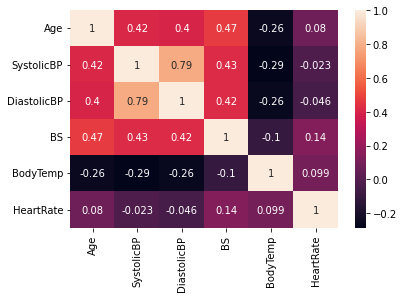

In [ ]:
#Visualising Correlation between the independent variable
sns.heatmap(df.corr(), annot=True)

In [ ]:
#Boxplot visualisation to check for outliers
for col in df.columns:
  fig = px.box(df, y=col, points='all', title="Box Plot of column {0}".format(col))
  fig.show()

In [ ]:
#Box Plot to check for outlier in individual target variable
for col in df.columns:
  fig = px.box(df, y=col, points='all', color="RiskLevel", title="Box Plot of column {0}".format(col))
  fig.show()

In [ ]:
#ECDF Plot
for col in df.columns:
  fig = px.ecdf(df, x=col, color="RiskLevel", title="ECDF Plot of column {0}".format(col))
  fig.show()

In [ ]:
#Using violin plot to compare the distribution of all variable
for col in df.columns:
  fig = px.violin(df, y=col, points='all', title="Violin Plot of column {0}".format(col))
  fig.show()

In [ ]:
#Using violin plot to compare the distribution of the target variable
for col in df.columns:
  fig = px.violin(df, y=col, points='all', color="RiskLevel", title="Violin Plot of column {0}".format(col))
  fig.show()

In [ ]:
#Histogram Plot To Understand The Distribution of the Target Variable
for col in df.columns:
  fig = px.histogram(df, x=col, color="RiskLevel", title="Distribution Plot of column {0}".format(col))
  fig.show()

In [ ]:
#Bivariate Analysis: Age-HeartRate
fig = px.scatter(df, x="Age", y="HeartRate", color="RiskLevel")
fig.show()

In [ ]:
#Bivariate Analysis: Age-BodyTemperature
fig = px.scatter(df, x="Age", y="BodyTemp", color="RiskLevel")
fig.show()

In [ ]:
#Looking at the distribution of the Target Variable
fig = px.pie(df, values=df['RiskLevel'].value_counts(), names=df['RiskLevel'].unique(), title='Distribution of Risk Level')
fig.show()

In [ ]:
df_tmp = df.copy()
df_tmp['age_bin'] = pd.cut(df_tmp['Age'], bins=np.arange(df_tmp['Age'].min(), df_tmp['Age'].max()+1, 5))
fig = px.pie(df_tmp, values=df_tmp['age_bin'].value_counts(), names=df_tmp['age_bin'].value_counts().index.astype('str'), title='Distribution of Age')
fig.show()

In [ ]:
#Splitting the Features and Target
X = df.drop("RiskLevel", axis=1)
y = df['RiskLevel']
print(X)
print(y)

#Splitting the Data into Training data & Test Data
X_train,X_test,y_train,y_test=train_test_split(X, y, test_size=0.1, random_state=42)
print(X.shape, X_train.shape, X_test.shape)

      Age  SystolicBP  DiastolicBP    BS  BodyTemp  HeartRate
0      25         130           80  15.0      98.0         86
1      35         140           90  13.0      98.0         70
2      29          90           70   8.0     100.0         80
3      30         140           85   7.0      98.0         70
4      35         120           60   6.1      98.0         76
...   ...         ...          ...   ...       ...        ...
1009   22         120           60  15.0      98.0         80
1010   55         120           90  18.0      98.0         60
1011   35          85           60  19.0      98.0         86
1012   43         120           90  18.0      98.0         70
1013   32         120           65   6.0     101.0         76

[1014 rows x 6 columns]
0       high risk
1       high risk
2       high risk
3       high risk
4        low risk
          ...    
1009    high risk
1010    high risk
1011    high risk
1012    high risk
1013     mid risk
Name: RiskLevel, Length: 1014, dt

In [ ]:
#Label Encoding of the Target Variable
pca = PCA(2)
riskMapping = {'low risk':0, 
        'mid risk':1, 
        'high risk':2}

df_tmp = df.copy()
df_tmp['RiskLevel'] = df_tmp['RiskLevel'].map(riskMapping)
mapping = df_tmp['RiskLevel']
df_tmp = pca.fit_transform(df_tmp)

In [ ]:
kmeans = KMeans(n_clusters= 3)
label = kmeans.fit_predict(df_tmp)

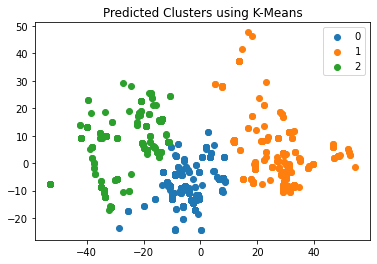

In [ ]:
#Predicted Clusters using K-Means
labelsType = np.unique(label)
for i in labelsType:
    plt.scatter(df_tmp[label == i , 0] , df_tmp[label == i , 1] , label = i)
plt.title("Predicted Clusters using K-Means")
plt.legend()
plt.show()

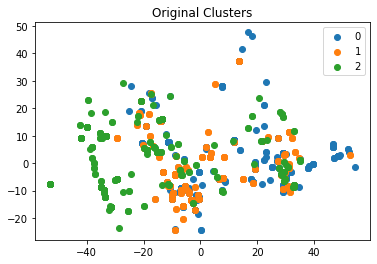

In [ ]:
#Original Clusters without Prediction
labelsType = np.unique(mapping)
for i in labelsType:
    plt.scatter(df_tmp[mapping == i , 0] , df_tmp[mapping == i , 1] , label = i)
plt.title("Original Clusters")
plt.legend()
plt.show()

In [ ]:
#Instantiating RandomForestClassifier and Predicting The Target Variable
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)

In [ ]:
#Accuracy Report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

   high risk       0.83      0.89      0.86        27
    low risk       0.86      0.62      0.72        40
    mid risk       0.70      0.89      0.78        35

    accuracy                           0.78       102
   macro avg       0.80      0.80      0.79       102
weighted avg       0.80      0.78      0.78       102

